### Figures and Tables of Lectue 5

This notebook is in html. To be able to run it, please click: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gunerilhan/economicgrowth/blob/master/lecture5/visuals/lecture5.ipynb)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
style.use('https://gunerilhan.github.io/img/fivethirtyeight-modified.mplstyle')
from tabulate import tabulate

In [2]:
colors = {0:['#264653','#219D8F','#E9C46A','#F4A261','#E76F51'],
  1:['#003049','#D62828','#F77F00','#FCBF49','#EAE2B7'],
  2:['#F72585','#7209B7','#3A0CA3','#4361EE','#4CC9F0'],
  3: ['#165aa7','#cb495c','#bb60d5','#f47915','#06ab54','#002070','#b27d12','#007030']}

In [3]:
# Read in Madison Project Database legend, so that we know which variables to use
df_legend = pd.read_excel('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2020.xlsx'
                          ,sheet_name='Notes',skiprows=14)
# Rename columns
df_legend.rename(columns={'Unnamed: 0':'Variable name','Unnamed: 1':'Definition'},
                 inplace=True)
df_legend = df_legend[['Variable name','Definition']]
df_legend.dropna(inplace=True)
# Create a dictionary of var names and definitions
df_legend = dict(zip(df_legend['Variable name'],df_legend['Definition']))

In [4]:
df_legend

{'Sources': 'Sources for GDP pc and population data',
 'Full data': 'Data in a single table',
 'GDP pc': 'Real GDP per capita in 2011$',
 'Population': 'Population, mid-year (thousands)',
 'Regional data': 'Regional GDP per capita and population estimates'}

In [5]:
# Read in the data
df = pd.read_excel('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2020.xlsx',
                   sheet_name='Full data')

In [6]:
# Here is how the data looks like, first 5 entries
df.head()

,countrycode,country,year,gdppc,pop
0,AFG,Afghanistan,1820,NaN,3280.0
1,AFG,Afghanistan,1870,NaN,4207.0
2,AFG,Afghanistan,1913,NaN,5730.0
3,AFG,Afghanistan,1950,1156.0,8150.0
4,AFG,Afghanistan,1951,1170.0,8284.0


In [7]:
# Select our countries
country_list = ['GBR','USA','JPN','CHN','IND']
df2 = df[df.countrycode.isin(country_list)]

In [8]:
df2.tail()

,countrycode,country,year,gdppc,pop
20748,USA,United States,2014,51664.0000,319035.7373
20749,USA,United States,2015,52591.0000,321396.7946
20750,USA,United States,2016,53015.0000,323730.2127
20751,USA,United States,2017,54007.7698,325810.2250
20752,USA,United States,2018,55334.7394,327834.6583


In [9]:
df_legend['GDP pc']

'Real GDP per capita in 2011$'

In [10]:
def plot_graphs(df2,country_list,filename):
    color_list = dict(zip(country_list,colors[3][:len(country_list)]))
    fig,ax = plt.subplots()
    sns.lineplot(x='year',y='gdppc',hue='countrycode',linewidth=3,
                 palette=color_list,legend=False,data=df2)
    for i,country in enumerate(country_list):
        df3 = df2[df2.countrycode==country]
        label = df3.country.unique()[0]
        loc_ = (2020,df3[df3.year==2018].gdppc) if label != 'Japan' else (2020,df3[df3.year==2018].gdppc+2500)
        ax.annotate(label,loc_,color=colors[3][i])
    ax.set_xlabel('Year')
    ax.set_ylabel('GDP per capita, 2011US$');
    plt.savefig(filename,bbox_inches='tight')

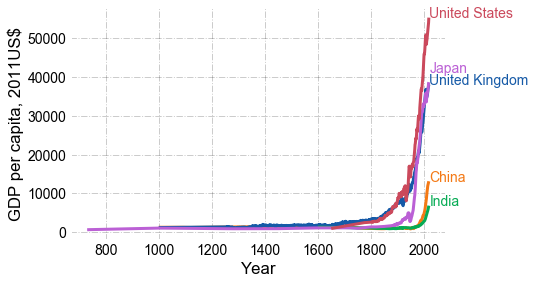

In [11]:
plot_graphs(df2,country_list,'../files/gdp_per_capita_time.svg')

In [12]:
# Penn World Tables, version 10.0
# Accessed from https://www.rug.nl/ggdc/productivity/pwt/?lang=en
# Read in legend
pwt_legend = pd.read_excel('https://www.rug.nl/ggdc/docs/pwt100.xlsx',sheet_name='Legend')
# Drop entries with missing data
pwt_legend.dropna(inplace=True)
# Create a dictionary of variable descriptions
pwt_legend = dict(zip(pwt_legend['Variable name'],pwt_legend['Variable definition']))

In [13]:
# Read in the data
pwt = pd.read_excel('https://www.rug.nl/ggdc/docs/pwt100.xlsx',sheet_name='Data')

In [14]:
# How the data looks like
pwt.tail()

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
12805,ZWE,Zimbabwe,US Dollar,2015,40142.488281,39794.128906,13.814629,6.393752,NaN,2.584653,...,0.140195,-0.287796,-0.051930,0.479178,0.651252,0.541670,0.616610,0.533067,0.422764,1.534175
12806,ZWE,Zimbabwe,US Dollar,2016,41876.109375,40958.945312,14.030331,6.504374,NaN,2.616257,...,0.131986,-0.251359,-0.016258,0.470550,0.650997,0.540076,0.619493,0.519469,0.416510,1.492129
12807,ZWE,Zimbabwe,US Dollar,2017,44671.093750,44311.761719,14.236595,6.611773,NaN,2.648248,...,0.126835,-0.203039,-0.039897,0.473402,0.639409,0.520766,0.619253,0.551528,0.415592,1.515128
12808,ZWE,Zimbabwe,US Dollar,2018,44319.914062,43408.386719,14.438802,6.714952,NaN,2.680630,...,0.144641,-0.264225,-0.020791,0.543600,0.654927,0.530694,0.640972,0.560584,0.425143,1.590753
12809,ZWE,Zimbabwe,US Dollar,2019,42293.992188,40820.296875,14.645468,6.831017,NaN,2.713408,...,0.213836,-0.271580,-0.089798,0.494539,0.652158,0.501721,0.487266,0.429213,0.420675,1.384638


In [15]:
pwt_legend['rtfpna']

'TFP at constant national prices (2017=1)'

In [16]:
# TFP measure is normalized to 1 in 2017 for each country
# To see the growth rate of TFP over time, renormalize the values to 1 in 1956
# Get the data in 1956 and add as a column
year_ = 1956
pwt = pwt.merge(pwt[pwt.year==year_][['countrycode','rtfpna']].rename(columns={'rtfpna':f'rtfpna, {year_}'})
          ,on='countrycode',how='left')
# Create a column with TFP is equal to 1 in 1956
pwt[f'rtfpna, {year_}=1'] = pwt.rtfpna/pwt[f'rtfpna, {year_}']

In [17]:
# select the countries 
pwt2 = pwt[pwt.countrycode.isin(country_list)]

In [18]:
# Here is how the data looks like
pwt2[['country','rtfpna',f'rtfpna, {year_}=1']].tail()

,country,rtfpna,"rtfpna, 1956=1"
12175,United States,0.992851,1.487833
12176,United States,0.993718,1.489132
12177,United States,1.000000,1.498546
12178,United States,1.008182,1.510807
12179,United States,1.016862,1.523815


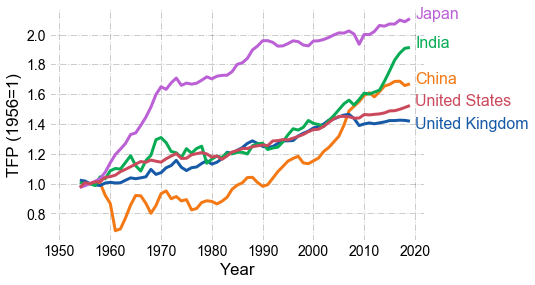

In [19]:
color_list = dict(zip(country_list,colors[3][:len(country_list)]))
fig,ax = plt.subplots()
sns.lineplot(x='year',y=f'rtfpna, {year_}=1',hue='countrycode',linewidth=3,
             palette=color_list,legend=False,data=pwt2)
for i,country in enumerate(country_list):
    pwt3 = pwt2[pwt2.countrycode==country]
    label = pwt3.country.unique()[0]
    if label == 'United Kingdom':
        loc_ = (2020,pwt3[pwt3.year==2019][f'rtfpna, {year_}=1']-.05)
    else:
        loc_ = (2020,pwt3[pwt3.year==2019][f'rtfpna, {year_}=1'])
    ax.annotate(label,loc_,color=colors[3][i],fontsize=16)
ax.set_xlabel('Year')
ax.set_ylabel(f'TFP ({year_}=1)');
ax.set_xlim(xmax=2022,xmin=1948)
plt.savefig('../files/tfp-over-time.svg',bbox_inches='tight')

In [20]:
pwt_legend['ctfp']

'TFP level at current PPPs (USA=1)'

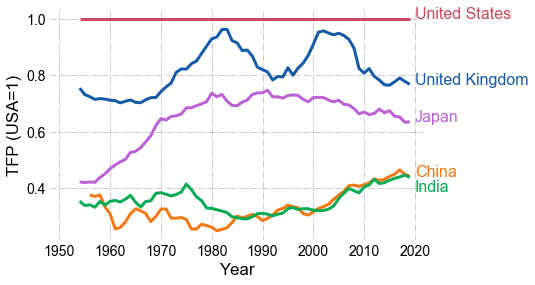

In [21]:
color_list = dict(zip(country_list,colors[3][:len(country_list)]))
fig,ax = plt.subplots()
sns.lineplot(x='year',y='ctfp',hue='countrycode',linewidth=3,
             palette=color_list,legend=False,data=pwt2)
for i,country in enumerate(country_list):
    pwt3 = pwt2[pwt2.countrycode==country]
    label = pwt3.country.unique()[0]
    if label == 'India':
        loc_ = (2020,pwt3[pwt3.year==2019]['ctfp']-.05)    
    else:
        loc_ = (2020,pwt3[pwt3.year==2019]['ctfp'])
    ax.annotate(label,loc_,color=colors[3][i],fontsize=16)
ax.set_xlabel('Year')
ax.set_ylabel('TFP (USA=1)');
ax.set_xlim(xmax=2022,xmin=1948)
#plt.text(loc_all[0],loc_all[1],source)
plt.savefig('../files/tfp-over-time-rel-usa.svg',bbox_inches='tight')